# Task 1:
## Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.


### Please fulfil the following requirements:
<br>
<b>
    
    1. Check your implementation on the data in the attached file.
    2. You must obtain r2-score > 0.9.
    3. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    4. Choose hyper parameters to obtain the required accuracy.
    5. The implementation must be vectoried and calculations must be performed as matrix vector 
    multiplications.
    6. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10.3, 8.3]

In [2]:
import pandas as pd

df = pd.read_csv('/content/MultiVarLR.csv')

In [3]:
Xs = df.iloc[:, :-1].to_numpy()
b = np.ones((24,1))

Xs = np.hstack((b,Xs))

y = df.iloc[:, -1].to_numpy().reshape(24,1)

In [4]:
def adam(features, target, lr, beta_1, beta_2, epsilon=1E-5, max_iter=500):
    
    thetas_upd, loss, preds = ([] for i in range(3))
    
    n_samp, n_feat = features.shape
    
    thetas = np.zeros((n_feat, 1))
    mom_theta, rms_theta = np.zeros((n_feat, 1)), np.zeros((n_feat, 1))

    print(thetas_upd)
    
    for i in range(max_iter):
        if i > 2 and abs(loss[-2] - loss[-1]) < 0.0001:
            break

        print('\n')
        print('*' * 18 + ' Iteration ' + str(i) + ' ' + '*' * 20)
        print('\n')

        h_x = features @ thetas

        preds.append(h_x)

        err = h_x - target
        cost = (err.T@err) / (2*n_samp)

        loss.append(cost[0])

        print('\nError Vector: \n{}\n\n j = {}\n'.format(err.T, cost))

        grad = (features.T @ err) / n_samp

        mom_theta = (beta_1 * mom_theta) + ((1 - beta_1) * grad)
        rms_theta = (beta_2 * rms_theta) + ((1 - beta_2) * grad ** 2)

        mom_corr = mom_theta / (1 - (beta_1) ** (i + 1))
        rms_corr = rms_theta / (1 - (beta_2) ** (i + 1))

        grad_norm = np.linalg.norm(grad)

        print('\nGradient Vector :', grad)
        print('\nGradient Vector Norm:', grad_norm)

        if grad_norm <= 0.0001:
            break

        print('m_0_0:', mom_theta)
        print('\n')
        print('m_0_0_corr:', mom_corr)

        print('v_0_0:', rms_theta)
        print('\n')
        print('v_0_0_corr:', rms_corr)

        thetas -= (lr * mom_corr) / (np.sqrt(rms_corr) + epsilon)

        print('\ntheta_new : \n', thetas)

        if(i==0):
          for theta_val in thetas:
            thetas_upd.append([theta_val[0]])
        
        else:
          for idx, value in enumerate(thetas):
            thetas_upd[idx] = np.append(thetas_upd[idx], value)

    return thetas_upd, thetas, loss, preds

In [5]:
thetas_upd, opt_thetas, loss, preds = adam(Xs, y, 0.5, beta_1=0.8, beta_2=0.99, epsilon=1E-4, max_iter=500)

Streaming output truncated to the last 5000 lines.


****************** Iteration 282 ********************



Error Vector: 
[[-0.22318527  1.47784451  2.842882   -1.83534666  4.293111    1.35407773
  -1.44758321 -0.63031998  0.24127596  2.90862324  1.77348926  2.27952237
   1.19702965  3.31913703 -3.43919105 -2.26358078 -2.01859647  0.2538393
  -0.2863565  -0.97394334 -0.54528264 -7.59583409  2.38816705 -1.21393611]]

 j = [[3.18840327]]


Gradient Vector : [[ 0.07732679]
 [ 0.68427675]
 [-0.08448222]
 [-0.67717557]]

Gradient Vector Norm: 0.969493732851901
m_0_0: [[ 0.07736874]
 [ 0.72346437]
 [-0.0731701 ]
 [-0.7277224 ]]


m_0_0_corr: [[ 0.07736874]
 [ 0.72346437]
 [-0.0731701 ]
 [-0.7277224 ]]
v_0_0: [[3.67520016e+01]
 [2.41157991e+05]
 [2.42260348e+05]
 [2.55390663e+05]]


v_0_0_corr: [[3.90222444e+01]
 [2.56054790e+05]
 [2.57225243e+05]
 [2.71166643e+05]]

theta_new : 
 [[-0.01363888]
 [ 0.40307746]
 [ 0.52512046]
 [ 1.08701404]]


****************** Iteration 283 **************

In [6]:
from sklearn.metrics import r2_score

y_pred = Xs @ opt_thetas
r2_score(y, y_pred)

0.9891191536205268

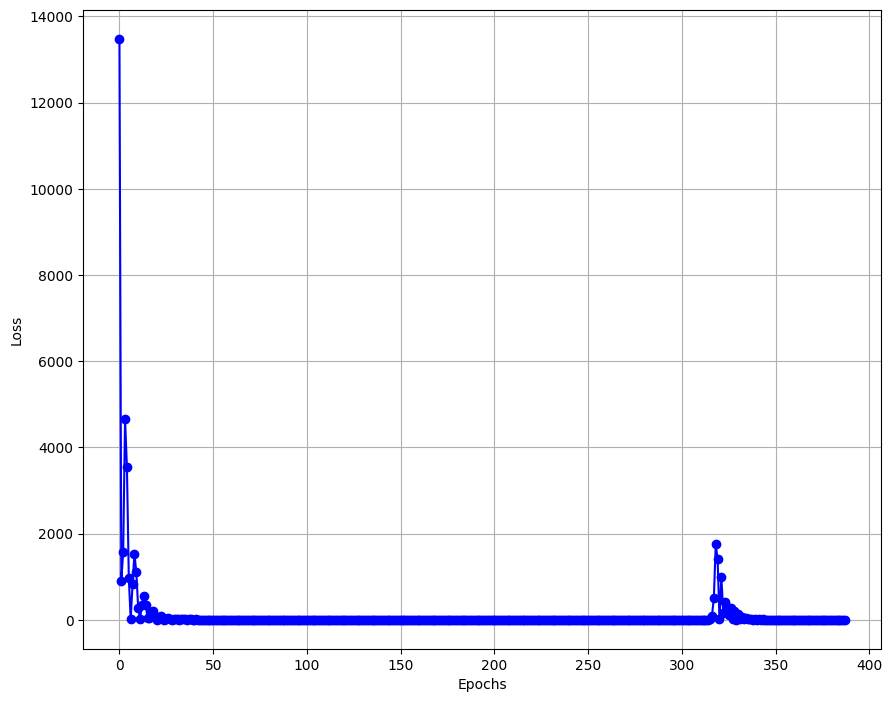

In [7]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='b');

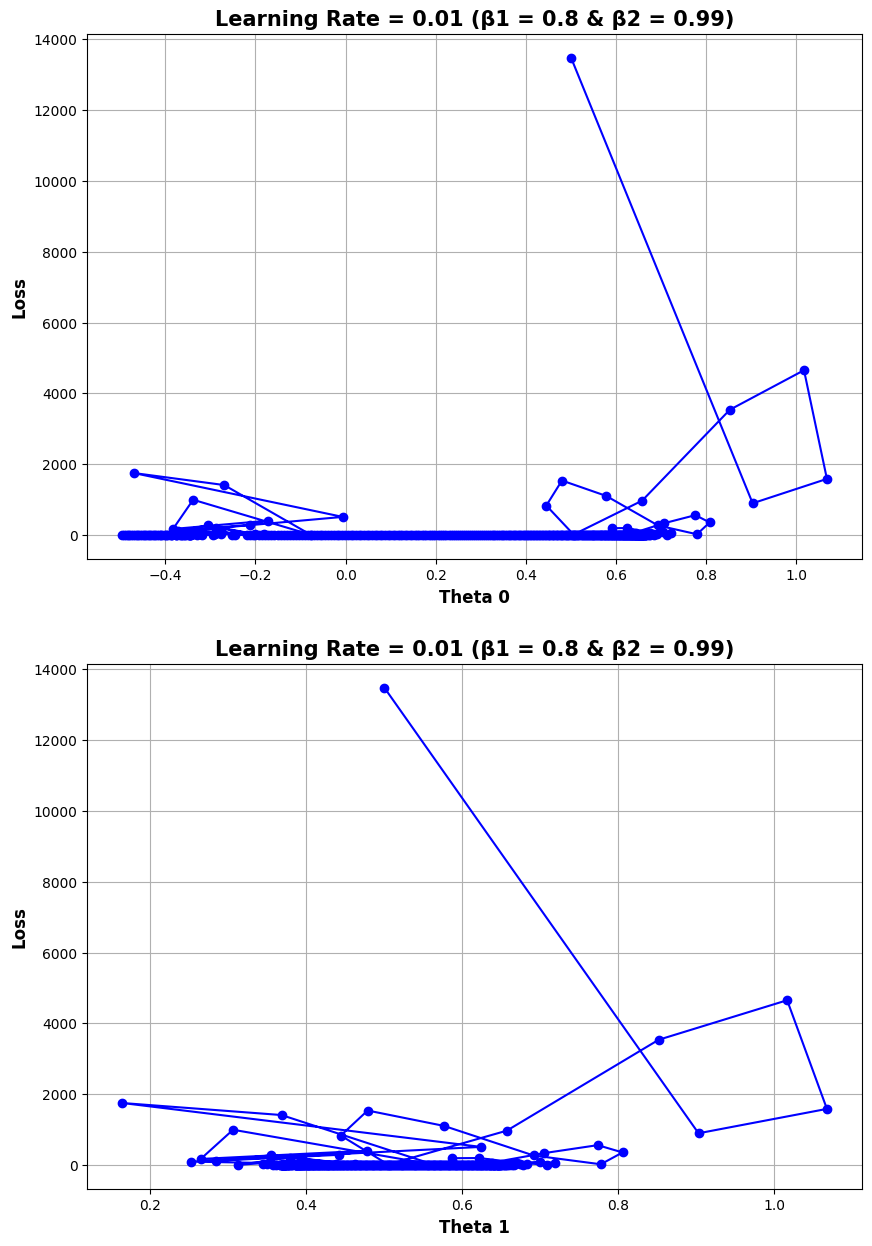

In [8]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.01 (β1 = 0.8 & β2 = 0.99)', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(thetas_upd[0], loss, marker = 'o', color='b')

ax2.set_title('Learning Rate = 0.01 (β1 = 0.8 & β2 = 0.99)', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(thetas_upd[1], loss, marker = 'o', color='b');

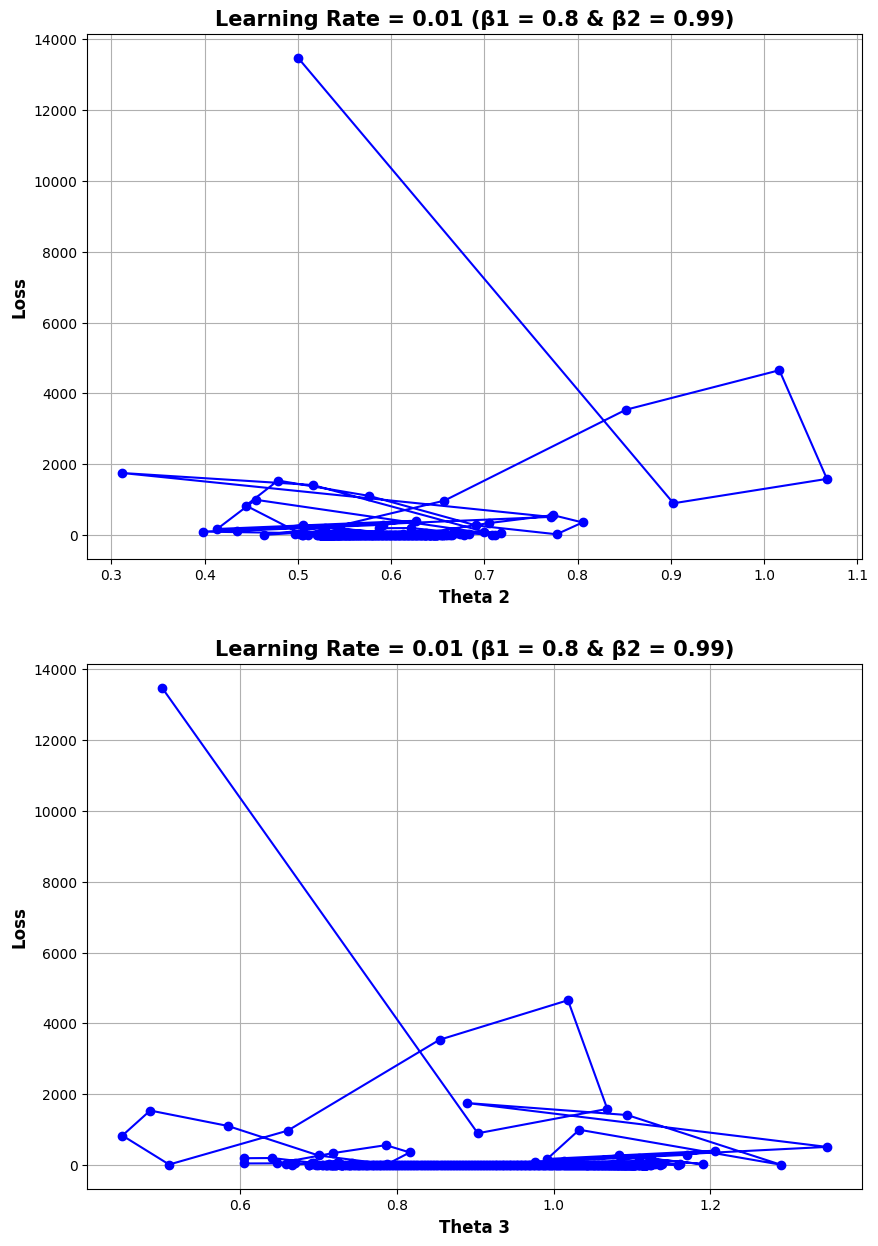

In [9]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.01 (β1 = 0.8 & β2 = 0.99)', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 2', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(thetas_upd[2], loss, marker = 'o', color='b')

ax2.set_title('Learning Rate = 0.01 (β1 = 0.8 & β2 = 0.99)', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 3', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(thetas_upd[3], loss, marker = 'o', color='b');

# Task 2
## Repeat task 1 using BFGS optimizer instead of Adam.
### All the requirments stated in task 1 must be also fulfilled in task 2.
### Compare the results from task 1 and task 2 and write your conclusion. 

In [10]:
def grad(features, target, thetas):
  
  n_samp = len(features)

  h_x = features @ thetas
  err = h_x - target

  cost = (err.T@err) / (2*n_samp)

  grad = (features.T @ err) / n_samp

  return grad, cost[0]


In [11]:
def hessian_update(identity_mat, delta_x, delta_grad, hessian_old):

  common_denominator = 1 / (delta_grad.T @ delta_x)

  f_exp = identity_mat - ((delta_x @ delta_grad.T) * common_denominator)
  s_exp = hessian_old @ (identity_mat - ((delta_grad @ delta_x.T) * common_denominator))
  t_exp = ((delta_x @ delta_x.T) * common_denominator)

  hessian_new = (f_exp @ s_exp) + t_exp

  return hessian_new


In [12]:
def bfgs(features, target, gradient_fun, tolerance=1E-5, lr=1.0, max_iter=500):
  
  thetas_upd, loss = [], []
    
  n_samp, n_feat = features.shape
    
  thetas = np.zeros((n_feat, 1))

  identity_mat = np.identity(n_feat)
  
  hessian = np.identity(n_feat)

  counter = 0

  grad, cost = gradient_fun(features, target, thetas)

  loss.append(cost)
  
  thetas_new = thetas - lr*(hessian @ grad)


  for theta_val in thetas:
    thetas_upd.append([theta_val[0]])

  
  while(counter < max_iter):
    
    grad_new, cost = gradient_fun(features, target, thetas_new)

    loss.append(cost)

    if (abs(loss[-2] - loss[-1]) < tolerance):
      break
    
    print('theta_old: {}\ntheta_new: {}\n'.format(thetas.T, thetas_new.T))

    print('grad_old: {}\ngrad_new: {}\n'.format(grad.T, grad_new.T))

    norm = np.linalg.norm(grad_new)

    print('norm: ', norm, '\n')

    if(abs(norm) < tolerance):
      break

    delta_x  = thetas_new - thetas

    delta_grad = grad_new - grad

    hessian = hessian_update(identity_mat, delta_x, delta_grad, hessian)

    print('B_inv ', hessian, '\n')
          
    thetas = thetas_new
    grad = grad_new

    thetas_new = thetas - lr*(hessian @ grad)

    for idx, value in enumerate(thetas_new):
      thetas_upd[idx] = np.append(thetas_upd[idx], value)

    counter += 1    

    print('*'*100,'\n\n')
  

  print('Found solution after {} iterations.'.format(counter))
  print('thetas_min = {}\nGradient = {}'.format(thetas_new.T, grad_new.T))
  
  return thetas_upd, thetas_new, loss

In [13]:
thetas_upd, opt_thetas, loss = bfgs(Xs, y, grad, tolerance=1E-4, lr=0.5, max_iter=500)

theta_old: [[0. 0. 0. 0.]]
theta_new: [[  81.22916667 6579.14583333 6594.16666667 6776.60416667]]

grad_old: [[  -162.45833333 -13158.29166667 -13188.33333333 -13553.20833333]]
grad_new: [[1.59953909e+06 1.29587540e+08 1.29883482e+08 1.33347167e+08]]

norm:  226818594.788175 

B_inv  [[ 0.99995027 -0.00402883 -0.00403803 -0.00414571]
 [-0.00402883  0.67360232 -0.32714308 -0.33586734]
 [-0.00403803 -0.32714308  0.67210981 -0.33663437]
 [-0.00414571 -0.33586734 -0.33663437  0.65438859]] 

**************************************************************************************************** 


theta_old: [[  81.22916667 6579.14583333 6594.16666667 6776.60416667]]
theta_new: [[  40.61216862 3287.69755513 3295.19957506 3392.95445106]]

grad_old: [[1.59953909e+06 1.29587540e+08 1.29883482e+08 1.33347167e+08]]
grad_new: [[  799770.26508705 64793740.05512758 64941683.99921253 66673668.12307587]]

norm:  113409297.34571147 

B_inv  [[ 0.99995027 -0.00402883 -0.00403803 -0.0041457 ]
 [-0.00402883 

In [14]:
from sklearn.metrics import r2_score

y_pred = Xs @ opt_thetas
r2_score(y, y_pred)

0.9896128170947136

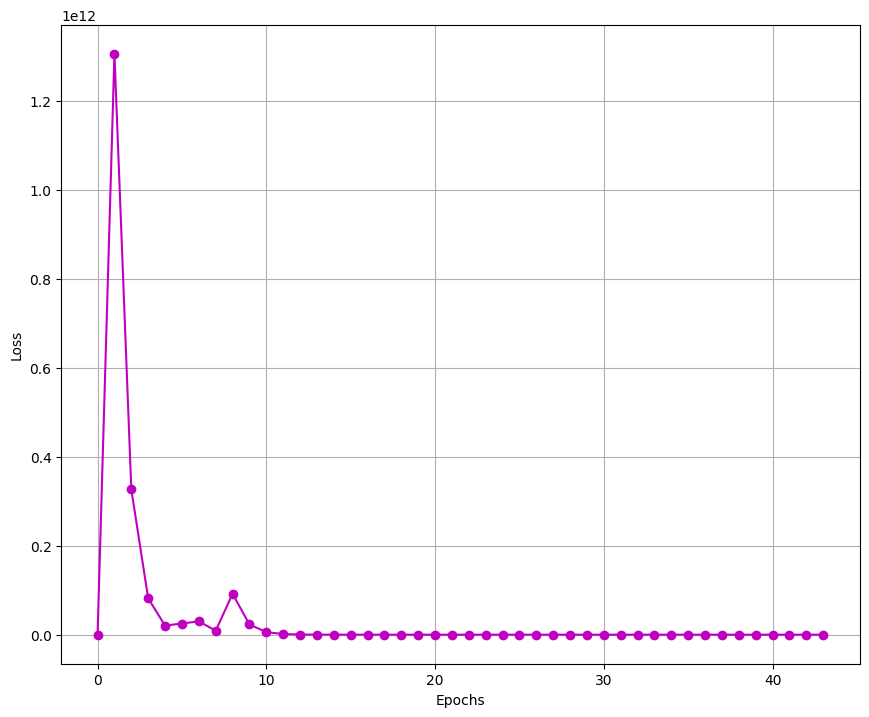

In [15]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.plot(loss, marker = 'o', color='m');

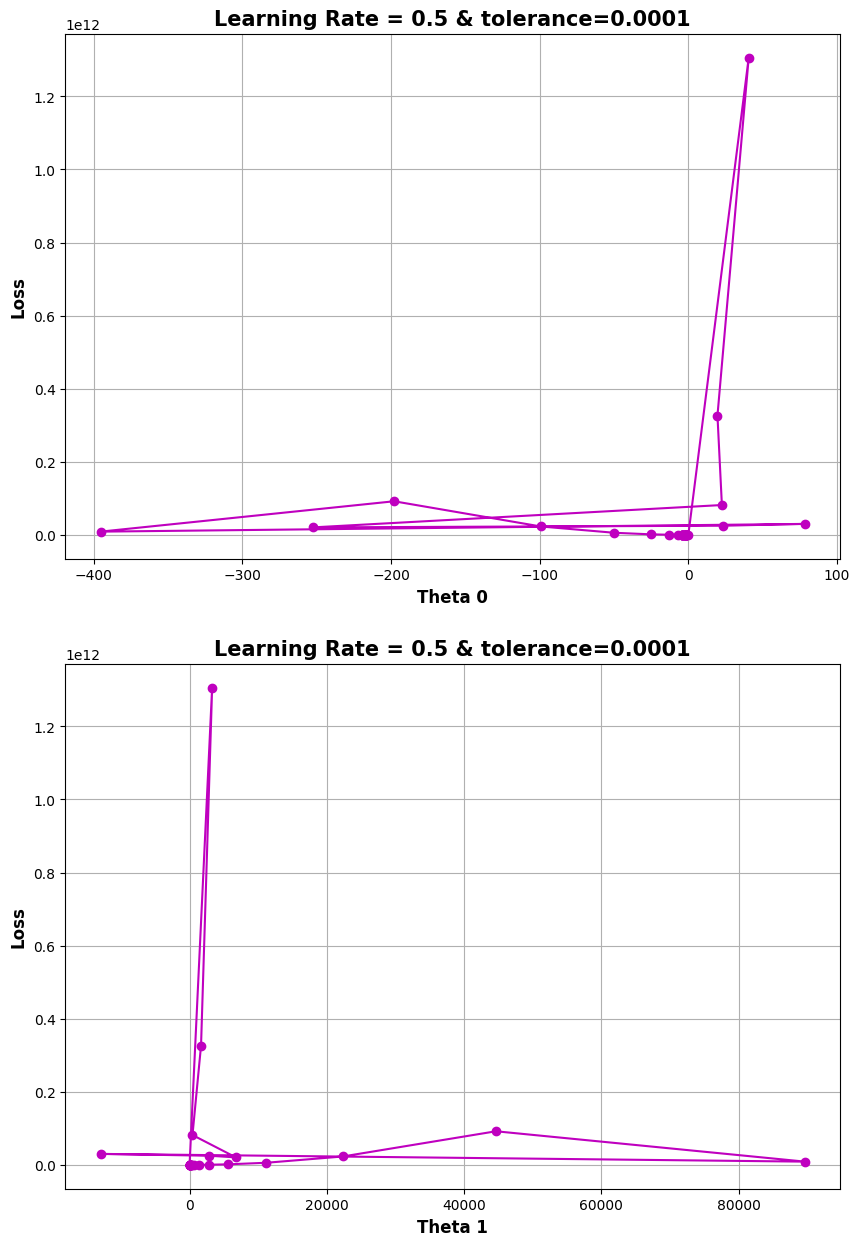

In [16]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.5 & tolerance=0.0001', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 0', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(thetas_upd[0], loss[:-1], marker = 'o', color='m')

ax2.set_title('Learning Rate = 0.5 & tolerance=0.0001', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 1', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(thetas_upd[1], loss[:-1], marker = 'o', color='m');

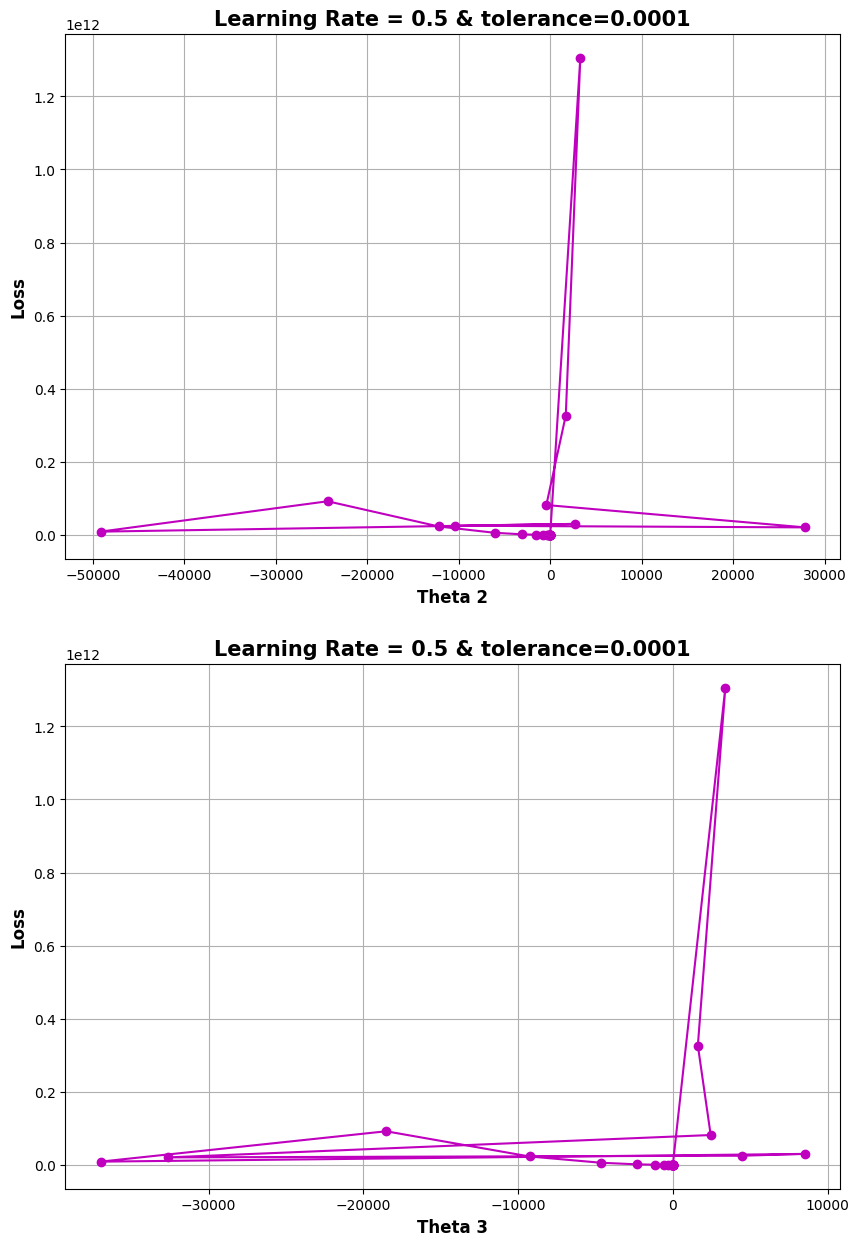

In [17]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.set_title('Learning Rate = 0.5 & tolerance=0.0001', fontweight='bold', fontsize=15)
ax1.set_xlabel('Theta 2', fontweight='bold', fontsize=12)
ax1.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax1.grid()


ax1.plot(thetas_upd[2], loss[:-1], marker = 'o', color='m')

ax2.set_title('Learning Rate = 0.5 & tolerance=0.0001', fontweight='bold', fontsize=15)
ax2.set_xlabel('Theta 3', fontweight='bold', fontsize=12)
ax2.set_ylabel('Loss', fontweight='bold', fontsize=12)
ax2.grid()

ax2.plot(thetas_upd[3], loss[:-1], marker = 'o', color='m');

<font size='5'>**Conclusion**</font>
> After comparing the convergence rates of the BFGS method and the Adam optimizer, with both methods using the same learning rate and tolerance value, it can be concluded that the BFGS method is significantly faster in achieving convergence than the Adam optimizer. The <b><font color='purple'>BFGS method</font></b> converges after only <b><font color='purple'>43 iterations</font></b> while the <b><font color='orange'>Adam optimizer</font></b> converges after <b><font color='orange'>388 iterations</font></b> iterations, which means that the BFGS method is approximately <b><font color='red'>9 times</font></b> faster in achieving convergence than the Adam optimizer. Therefore, for optimization problems where fast convergence is a critical factor, the BFGS method could be a more suitable choice over the Adam optimizer, especially when using the same learning rate and tolerance value for both methods.

<font color='red'><b><b><i>Notes:</i></b></font>
    
<font color='red'><b><b><i>You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b></font>

<font color='red'><b><i>Any copied code from the internet will be considered as cheeeting</i></b></i></b></font>

<font color='red'><b><i>Any code exchange between trainees will be considered as cheeeting</i></b></font>